In [66]:
# plotting codes for figures

# 1. 折线图

import matplotlib.pyplot as plt
import numpy as np

hyparams = np.array([2, 3, 4, 5])

# First All Weibo Then Twitter
input_s = """
3.58%	6.90%	2.86%	16.89%	3.29%	24.71%	3.40%
2.48%	4.84%	1.83%	13.55%	2.20%	20.39%	2.30%
2.63%	5.18%	1.95%	14.47%	2.34%	21.82%	2.45%
2.52%	4.90%	1.88%	13.61%	2.24%	20.57%	2.34%

2.96%	5.68%	2.28%	14.93%	2.68%	22.09%	2.78%
3.00%	5.74%	2.32%	14.96%	2.72%	22.15%	2.82%
2.95%	5.75%	2.27%	15.06%	2.67%	22.31%	2.77%
2.97%	5.66%	2.28%	14.99%	2.68%	22.23%	2.79%
"""

# transform input_s to map data
def transform_to_map(hyparams, input: str):
    data = {}
    names = ["weibo", "twitter"]
    metrics_names = ["MRR", "A@10", "MAP@10", "A@50", "MAP@50", "A@100", "MAP@100"]
    selected_indices = [0, 1, 3, 5]
    lines = input.split('\n')
    cnt = 0
    for line in lines:
        if len(line) == 0: continue
        name = names[int(cnt / len(hyparams))]
        cnt += 1

        if name not in data: data[name] = []
        metrics = line.split('\t')
        metrics = list(map(lambda x: float(x[:-1]), metrics))
        data[name].append(metrics)

    data2 = {}
    for name, values in data.items():
        data2[name] = {}
        for midx, mname in enumerate(metrics_names):
            if midx not in selected_indices: continue
            data2[name][mname] = [values[i][midx] for i in range(len(values))]
    
    return data2


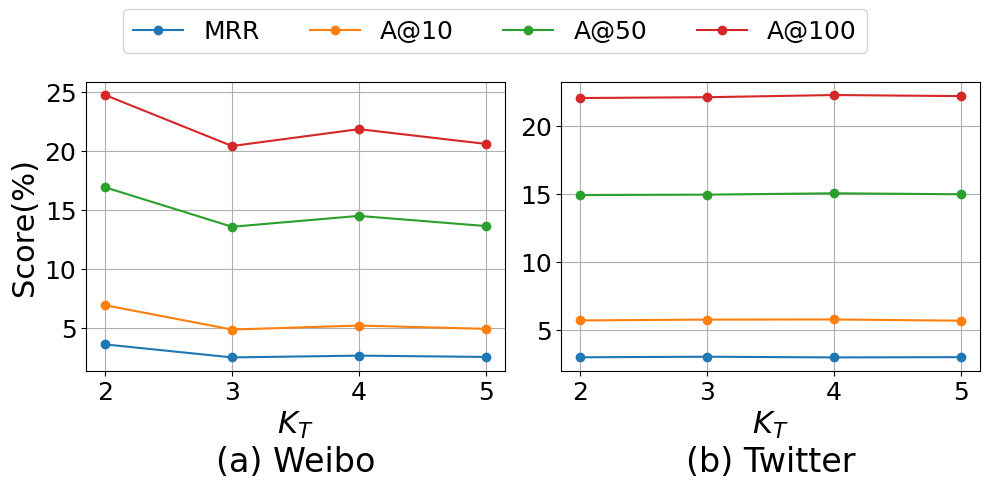

In [70]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# hp
label_size = 22
title_size = 24
legend_size = 18
num_size = 18

data2 = transform_to_map(hyparams, input_s)
for k, values in data2.items():
    ax = ax1 if k == 'weibo' else ax2
    for mname, mvalues in values.items():
        ax.plot(hyparams, mvalues, label=mname, marker='o')
    ax.set_xlabel('$K_T$', fontsize=label_size)
    if k == 'weibo':
        ax.set_ylabel('Score(%)', fontsize=label_size)
    ax.grid(True)

    ax.tick_params(axis='x', labelsize=num_size)
    ax.tick_params(axis='y', labelsize=num_size)

lines, labels = ax1.get_legend_handles_labels()
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4, fontsize=legend_size)

# 添加子图标题
ax1_title = ax1.set_title('(a) Weibo', y=-0.3, pad=-10, fontsize=title_size)
ax2_title = ax2.set_title('(b) Twitter', y=-0.3, pad=-10, fontsize=title_size)

# Overall title and layout
plt.tight_layout()
plt.subplots_adjust(top=0.88)
# plt.show()
plt.savefig('/remote-home/share/dmb_nas/wangzejian/ntopic.png', dpi=300, bbox_inches='tight')


In [71]:
# 2. 色格图

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

hyparams1 = np.array([32, 16, 8]) # hu
hyparams2 = np.array([2, 4, 8]) # nh

# First All Weibo Then Twitter
input_s = """
3.58%	6.90%	2.86%	16.89%	3.29%	24.71%	3.40%
2.48%	4.84%	1.83%	13.55%	2.20%	20.39%	2.30%
2.63%	5.18%	1.95%	14.47%	2.34%	21.82%	2.45%
2.52%	4.90%	1.88%	13.61%	2.24%	20.57%	2.34%
2.96%	5.68%	2.28%	14.93%	2.68%	22.09%	2.78%
3.00%	5.74%	2.32%	14.96%	2.72%	22.15%	2.82%
"""

def transform_to_map2(hyparams, input: str):
    data = {}
    names = ["weibo", "twitter"]
    # metrics_names = ["MRR", "A@10", "MAP@10", "A@50", "MAP@50", "A@100", "MAP@100"]
    metrics_names = ["mrr", "hits10", "map10", "hits50", "map50", "hits100", "map100"]
    selected_indices = [0, 1, 2]
    lines = input.split('\n')
    cnt = 0
    print(len(hyparams))
    for line in lines:
        if len(line) == 0: continue
        name = names[int(cnt / len(hyparams))]
        cnt += 1

        if name not in data: data[name] = []
        metrics = line.split('\t')
        metrics = list(map(lambda x: float(x[:-1]), metrics))
        data[name].append(metrics)

    data2 = {}
    for name, values in data.items():
        data2[name] = {}
        for midx, mname in enumerate(metrics_names):
            if midx not in selected_indices: continue
            data2[name][mname] = [values[i][midx] for i in range(len(values))]
    
    return data2

hyparams = [(hp1, hp2) for hp1 in hyparams1 for hp2 in hyparams2]
data2 = transform_to_map2(hyparams, input_s)
data2

9


{'weibo': {'mrr': [3.58, 2.48, 2.63, 2.52, 2.96, 3.0],
  'hits10': [6.9, 4.84, 5.18, 4.9, 5.68, 5.74],
  'map10': [2.86, 1.83, 1.95, 1.88, 2.28, 2.32]}}

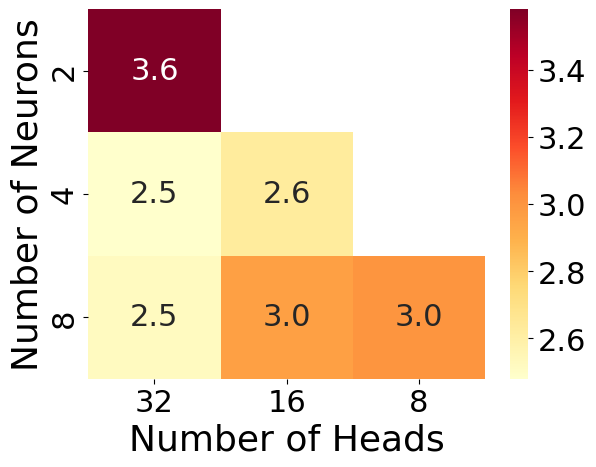

In [79]:
mask = np.triu(np.ones_like((3,3), dtype=bool), 1)

num_size = 22
label_size = 26
annot_size = 22
legend_size = 22

for k, values in data2.items():
    for mname, mvalues in values.items():
        
        cnt = 0
        data = []
        for fill_idx in range(1, len(hyparams1)+1):
            line = mvalues[cnt: cnt+fill_idx] + [0] * (len(hyparams2) - fill_idx)
            cnt += fill_idx
            data.append(line)
        # print(data)

        mask = np.triu(np.ones_like(data, dtype=bool), 1)
        ax = sns.heatmap(data, annot=True, fmt=".1f", cmap="YlOrRd", xticklabels=hyparams1, yticklabels=hyparams2, mask=mask, annot_kws={"size": annot_size})

        ax.set_xlabel('Number of Heads', fontsize=label_size)
        ax.set_ylabel('Number of Neurons', fontsize=label_size)
        # plt.title('(a) MRR', fontsize=12, pad=20)

        ax.tick_params(axis='x', labelsize=num_size)
        ax.tick_params(axis='y', labelsize=num_size)

        cbar = ax.collections[0].colorbar
        cbar.ax.tick_params(labelsize=legend_size)  # 调整颜色条刻度标签字体大小

        # 将纵轴的标签文字横过来
        # ax.yaxis.set_label_position("right")
        # ax.yaxis.set_label_coords(1.05, 0.5)
        # ax.yaxis.label.set_rotation(0)

        plt.savefig('/remote-home/share/dmb_nas/wangzejian/nhead-{ds}-{m}.png'.format(
                ds=k, m=mname
            ), dpi=300, bbox_inches='tight')
        break
    break
